In [6]:
import plotly.offline as pyo
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [7]:
dataset = pd.read_csv('https://rawgit.com/seyunkim/Public-Datasets/master/data.csv')
dataset[:5]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
dataset.shape

(569, 31)

In [10]:
#just checking if there is any null value..
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [0]:
#mapping function to map different string objects to integer
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [0]:
dataset=mapping(dataset,feature="diagnosis")

In [13]:
dataset.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
151,1,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.14860
543,1,13.210,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,0.1628,...,14.370,37.17,92.48,629.6,0.1072,0.1381,0.1062,0.07958,0.2473,0.06443
148,1,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,...,15.850,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683
430,0,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,...,16.350,27.57,125.40,832.7,0.1419,0.7090,0.9019,0.24750,0.2866,0.11550
79,1,12.860,18.00,83.19,506.3,0.09934,0.09546,0.03889,0.02315,0.1718,...,14.240,24.82,91.88,622.1,0.1289,0.2141,0.1731,0.07926,0.2779,0.07918


In [0]:
#divide dataset into x(input) and y(output)
X=dataset.drop(["diagnosis"],axis=1)
y=dataset["diagnosis"]

In [0]:
#divide dataset into training set, cross validation set, and test set
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [0]:
#hein?? what is all this??
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

In [0]:
firstModel=getModel([30,50,1])

In [0]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

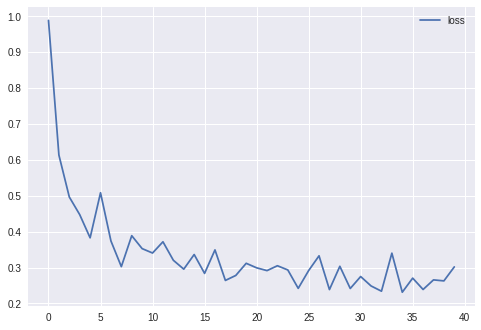

In [19]:
firstModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])

In [20]:
scores=firstModel.evaluate(np.array(valX),np.array(valY))

91/91 [==============================] - 0s 254us/step


In [21]:
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)

Loss: 0.19722979605852903
Accuracy 92.30769315918724


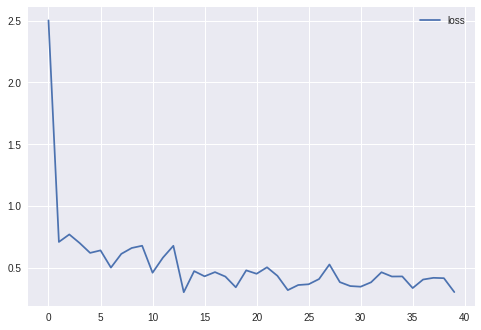

In [22]:
secondModel=getModel([30,100,1])
secondModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])

In [23]:
scores2=secondModel.evaluate(np.array(valX),np.array(valY))

91/91 [==============================] - 0s 349us/step


In [24]:
print(scores2)

[0.9249100842318692, 0.8021977995778178]


In [0]:
thirdModel=getModel([30,50,70,40,1])

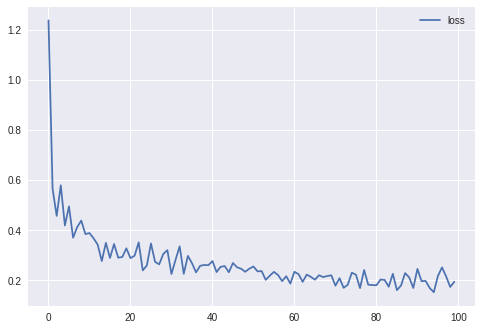

In [26]:
thirdModel.fit(np.array(trainX),np.array(trainY),epochs=100,callbacks=[plot_losses])

In [27]:
scores3=thirdModel.evaluate(np.array(valX),np.array(valY))

91/91 [==============================] - 0s 485us/step


In [28]:
print(scores3)

[0.3402560608727591, 0.8901098874899057]


In [0]:
predY=firstModel.predict(np.array(testX))
predY=np.round(predY).astype(int).reshape(1,-1)[0]

In [30]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY,testY)
tn, fn, fp, tp=confusion_matrix(predY,testY).ravel()
m=pd.crosstab(predY,testY)
print("Confusion matrix")
print(m)

Confusion matrix
diagnosis   0   1
row_0            
0          40   2
1           3  69


In [31]:
sens=tp/(tp+fn)
spec=tn/(tn+fp)
print("Senstivity:",sens)
print("Specificity:",spec)

Senstivity: 0.971830985915493
Specificity: 0.9302325581395349
